In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from src import utilities
from src import optimization

In [2]:
ger_dataset_path = '../../../datasets/preprocessed/ger/'
features_scores = utilities.read_features_scores(ger_dataset_path)
train_data = utilities.read_parquet(ger_dataset_path + 'train.parquet')

In [3]:
target = 'defaulted'
y = np.array(train_data[target])
y

array([False,  True,  True,  True, False, False,  True,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False,  True,  True, False,  True,  True,  True,
        True,  True, False, False, False,  True,  True,  True, False,
        True, False,  True, False, False,  True, False, False, False,
       False, False,  True,  True, False,  True,  True, False, False,
       False,  True,  True, False, False, False, False,  True,  True,
       False, False, False,  True, False,  True, False,  True,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
       False,  True, False,  True,  True, False, False, False, False,
       False,  True, False,  True, False, False,  True,  True, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False,  True,  True, False, False, False,  True,
        True, False,

In [4]:
X = train_data.drop([target], axis=1, inplace=False)
X

,exist-check-acc-status,duration,credit-history,purpose,credit-amount,sav-acc,employment-years,install-rate,marriage-sex,guarantor,residency-dur,property,age,other-install-plans,housing,existing-credits,job,phone-provided
0,1.176263,-0.278767,0.733741,0.410063,0.194992,-0.271358,-0.032103,-0.157300,-0.235341,-0.027974,-0.016367,-0.034191,-0.046227,0.121179,0.194156,-0.075836,0.022780,0.098638
1,-0.818099,-0.623823,-0.088319,-0.353105,0.194992,-0.271358,-0.470820,-0.157300,-0.235341,-0.027974,-0.016367,-0.034191,-0.046227,0.121179,0.194156,-0.075836,0.022780,0.098638
2,-0.818099,0.168017,-1.234071,-0.353105,-0.129812,-0.271358,-0.032103,-0.157300,0.165548,-0.027974,-0.016367,-0.034191,0.279650,-0.477551,0.194156,0.138930,0.022780,-0.064691
3,-0.818099,0.168017,-0.088319,-0.353105,-0.129812,-0.271358,-0.470820,0.064539,-0.235341,-0.027974,0.112478,0.461035,0.385750,0.121179,0.194156,-0.075836,0.097164,-0.064691
4,1.176263,-0.195526,-0.088319,-0.230524,-0.129812,-0.271358,0.394415,-0.157300,0.165548,-0.027974,0.112478,0.461035,-0.524461,0.121179,0.194156,-0.075836,0.022780,0.098638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,-0.818099,0.168017,-0.088319,-0.353105,-0.129812,-0.271358,-0.032103,-0.157300,-0.235341,-0.027974,-0.016367,0.461035,-0.524461,0.121179,0.194156,-0.075836,0.097164,-0.064691
796,1.176263,-0.195526,-0.088319,-0.230524,-0.440023,0.862784,-0.032103,0.155466,0.165548,-0.027974,-0.016367,-0.028573,-0.066386,0.121179,0.194156,0.138930,-0.189242,0.098638
797,-0.401392,0.454297,-0.088319,-0.353105,0.194992,0.704246,-0.032103,0.251314,-0.235341,-0.027974,-0.016367,0.461035,-0.046227,0.121179,0.194156,-0.075836,0.097164,-0.064691
798,1.176263,1.181636,0.733741,-0.353105,-0.216952,-0.139552,-0.032103,-0.157300,-0.235341,-0.027974,-0.016367,-0.034191,0.279650,0.121179,0.194156,0.138930,0.097164,-0.064691


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [6]:
X_train

,exist-check-acc-status,duration,credit-history,purpose,credit-amount,sav-acc,employment-years,install-rate,marriage-sex,guarantor,residency-dur,property,age,other-install-plans,housing,existing-credits,job,phone-provided
663,1.176263,0.454297,-0.088319,-0.099235,0.194992,-0.271358,-0.032103,-0.157300,-0.235341,-0.027974,-0.016367,0.461035,-0.065685,0.121179,-0.404445,-0.075836,0.022780,-0.064691
695,-0.818099,-0.195526,-0.088319,-0.099235,0.194992,-0.271358,0.235566,-0.157300,0.165548,-0.027974,-0.016367,-0.028573,0.279650,0.121179,-0.404445,-0.075836,-0.189242,0.098638
551,0.405465,-0.278767,0.733741,0.410063,0.194992,-0.271358,0.235566,-0.157300,0.165548,-0.027974,-0.016367,-0.028573,0.279650,0.121179,0.194156,-0.075836,0.022780,-0.064691
432,1.176263,1.181636,0.733741,-0.353105,-0.505406,-0.271358,0.394415,0.251314,0.165548,-0.027974,-0.016367,-0.586082,0.279650,0.121179,0.194156,0.138930,-0.189242,0.098638
782,1.176263,0.168017,0.733741,-0.587787,0.194992,-0.139552,-0.032103,-0.157300,-0.235341,-0.027974,-0.016367,-0.034191,-0.046227,0.121179,0.194156,-0.075836,0.022780,-0.064691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,1.176263,-0.623823,-0.085158,-0.099235,-0.505406,0.862784,0.394415,0.155466,-0.235341,-0.027974,-0.016367,-0.034191,0.279650,0.121179,0.194156,0.138930,0.022780,0.098638
358,-0.818099,-0.623823,-0.088319,0.805625,-0.440023,-0.271358,0.394415,-0.157300,0.165548,-0.027974,-0.016367,-0.028573,-0.065685,0.121179,0.194156,-0.075836,0.022780,-0.064691
763,1.176263,0.168017,-0.088319,0.410063,0.194992,0.862784,0.394415,0.155466,-0.441833,-0.027974,-0.016367,0.461035,-0.066386,0.121179,0.194156,-0.075836,0.097164,-0.064691
504,1.176263,1.181636,-0.088319,0.410063,0.194992,-0.271358,0.394415,0.155466,0.138519,-0.027974,-0.016367,0.461035,-0.065685,0.121179,-0.404445,-0.075836,0.022780,-0.064691


In [7]:
X_test

,exist-check-acc-status,duration,credit-history,purpose,credit-amount,sav-acc,employment-years,install-rate,marriage-sex,guarantor,residency-dur,property,age,other-install-plans,housing,existing-credits,job,phone-provided
413,-0.401392,0.454297,-0.088319,-0.230524,0.194992,-0.271358,-0.032103,0.155466,0.138519,-0.027974,0.112478,0.461035,-0.065685,-0.477551,0.194156,-0.075836,0.022780,0.098638
96,1.176263,-0.195526,-0.088319,0.410063,0.194992,-0.271358,-0.470820,-0.157300,0.165548,-0.027974,0.112478,0.461035,-0.046227,0.121179,0.194156,-0.075836,0.022780,-0.064691
370,-0.818099,-0.195526,-0.088319,-0.353105,1.459626,0.704246,0.394415,0.155466,0.165548,-0.027974,-0.016367,0.461035,-0.524461,0.121179,0.194156,-0.075836,0.097164,-0.064691
88,-0.818099,-0.623823,-0.088319,-0.587787,-0.505406,-0.271358,-0.319230,0.155466,-0.441833,-0.027974,-0.016367,-0.034191,0.279650,0.121179,0.194156,-0.075836,-0.189242,-0.064691
768,1.176263,0.168017,-0.088319,0.805625,1.459626,-0.139552,-0.470820,0.251314,-0.235341,-0.027974,-0.016367,-0.034191,-0.524461,0.121179,0.194156,-0.075836,0.022780,0.098638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,0.405465,0.168017,-0.088319,0.410063,0.194992,-0.271358,-0.470820,0.155466,-0.235341,-0.027974,-0.016367,0.461035,-0.524461,0.121179,0.194156,-0.075836,0.097164,-0.064691
562,0.405465,-0.195526,-0.088319,0.410063,-0.129812,0.862784,-0.032103,0.064539,-0.235341,-0.027974,-0.016367,-0.034191,-0.066386,0.121179,0.194156,-0.075836,0.097164,-0.064691
473,1.176263,0.168017,-0.088319,0.410063,-0.129812,0.862784,0.235566,-0.157300,0.165548,-0.027974,-0.016367,-0.028573,0.279650,-0.477551,0.194156,-0.075836,0.022780,0.098638
421,-0.401392,-0.623823,-0.088319,0.410063,0.194992,-0.271358,0.394415,-0.157300,0.165548,-0.027974,-0.016367,-0.034191,-0.524461,0.121179,-0.404445,-0.075836,0.022780,-0.064691


In [8]:
y_train

array([False,  True, False, False, False,  True, False, False, False,
       False, False, False,  True, False, False,  True, False, False,
        True,  True, False, False, False,  True, False, False, False,
       False,  True,  True, False, False, False,  True, False,  True,
        True, False, False, False,  True, False, False, False,  True,
       False, False, False, False,  True, False, False,  True, False,
       False, False,  True, False, False, False,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True, False, False, False, False, False, False,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False,  True,  True,  True, False,  True, False,
       False, False, False, False, False, False, False,  True,  True,
        True, False,

In [9]:
y_test

array([False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False,  True,
       False,  True,  True, False,  True, False,  True,  True, False,
       False, False, False,  True, False, False,  True, False,  True,
       False, False, False,  True, False, False, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False,  True, False,  True, False, False,
        True, False,  True,  True,  True,  True, False, False, False,
       False,  True, False, False, False,  True, False, False,  True,
       False, False,  True, False, False, False, False, False,  True,
       False,  True,  True, False, False,  True, False, False,  True,
       False, False,  True,  True, False, False, False, False,  True,
       False, False, False, False,  True,  True, False, False, False,
       False, False,

In [10]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [11]:
y_pred = pd.Series(model.predict(X_test))
y_pred

0      False
1      False
2      False
3       True
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

In [12]:
z = pd.concat([pd.Series(y_test), y_pred], axis=1)
z.columns = ['True', 'Prediction']
z

,True,Prediction
0,False,False
1,False,False
2,False,False
3,False,True
4,False,False
...,...,...
195,True,False
196,False,False
197,False,False
198,False,False


In [13]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.785
Precision: 0.7037037037037037
Recall: 0.35185185185185186


Text(0.5, 23.52222222222222, 'Predicted')

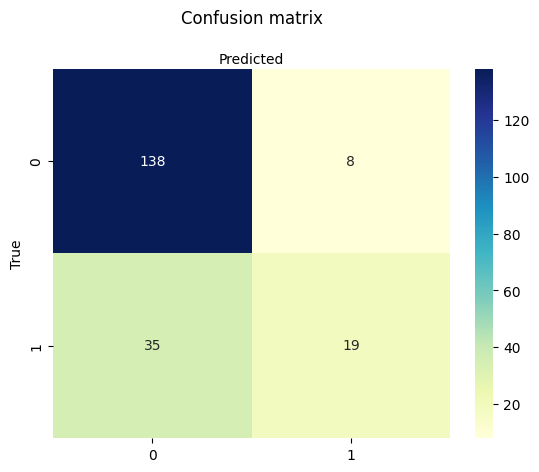

In [14]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

In [15]:
model.classes_

array([False,  True])

In [16]:
model.coef_

array([[-0.90465897, -0.88481545, -0.49117536, -0.90814468, -0.99023796,
        -0.75347023, -0.48158165, -0.8276065 , -0.67325633, -1.05106419,
        -0.52256808, -0.66683807, -0.60386419, -0.65987386, -0.27325399,
        -0.10511324,  0.86061225, -0.70679591]])

In [17]:
model.intercept_

array([-0.94237817])

In [20]:
X_test.loc[413].values

array([-0.40139178,  0.45429708, -0.08831862, -0.23052366,  0.19499179,
       -0.27135784, -0.03210325,  0.15546647,  0.13851893, -0.02797385,
        0.11247798,  0.46103496, -0.06568479, -0.47755083,  0.19415601,
       -0.07583581,  0.02278003,  0.09863759])

In [21]:
model.predict([X_test.loc[413].values])

array([False])

In [22]:
y_test[0]

False

In [24]:
model.predict([X_test.loc[88].values])

array([ True])

In [25]:
y_test[3]

False

In [26]:
model.coef_ * X_test.loc[413].values

array([[ 0.36312268, -0.40196907,  0.04337993,  0.20934884, -0.19308827,
         0.20446006,  0.01546033, -0.12866506, -0.09325875,  0.02940231,
        -0.0587774 , -0.30743566,  0.0396647 ,  0.31512331, -0.0530539 ,
         0.00797135,  0.01960477, -0.06971664]])

In [27]:
model.intercept_[0] + np.dot(model.coef_, X_test.loc[413].values)[0]

-1.0008046683005165

In [28]:
1/(1+np.exp(-(-1.0008046683005165)))

0.2687832433976681

In [29]:
z[z['Prediction'] == True]

,True,Prediction
3,False,True
10,True,True
11,True,True
16,False,True
17,False,True
28,True,True
56,True,True
64,True,True
67,True,True
75,True,True


In [30]:
X_test.index

Index([413,  96, 370,  88, 768, 738, 134, 256, 405, 733,
       ...
       375, 159, 141, 212, 240, 318, 562, 473, 421, 419],
      dtype='int64', length=200)

In [31]:
model.predict([X_test.loc[88].values])

array([ True])

In [32]:
y_test[3]

False

In [33]:
model.intercept_[0] + np.dot(model.coef_, X_test.loc[88].values)[0]

1.6040331652439197

In [34]:
1/(1+np.exp(-(model.intercept_[0] + np.dot(model.coef_, X_test.loc[88].values)[0])))

0.8325813210198211

In [35]:
y_pred = model.predict_proba(X_test)[:,0] < 0.1

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.735
Precision: 1.0
Recall: 0.018518518518518517


In [36]:
y_pred = model.predict_proba(X_test)[:,0] < 0.2

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.745
Precision: 0.8
Recall: 0.07407407407407407


In [37]:
y_pred = model.predict_proba(X_test)[:,0] < 0.3

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.755
Precision: 0.7272727272727273
Recall: 0.14814814814814814


In [38]:
y_pred = model.predict_proba(X_test)[:,0] < 0.4

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.775
Precision: 0.8
Recall: 0.2222222222222222


In [39]:
y_pred = model.predict_proba(X_test)[:,0] < 0.5

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.785
Precision: 0.7037037037037037
Recall: 0.35185185185185186


In [40]:
y_pred = model.predict_proba(X_test)[:,0] < 0.6

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.79
Precision: 0.62
Recall: 0.5740740740740741


In [41]:
y_pred = model.predict_proba(X_test)[:,0] < 0.7

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.77
Precision: 0.5625
Recall: 0.6666666666666666


In [42]:
y_pred = model.predict_proba(X_test)[:,0] < 0.8

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.72
Precision: 0.48863636363636365
Recall: 0.7962962962962963


In [43]:
y_pred = model.predict_proba(X_test)[:,0] < 0.9

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.6
Precision: 0.3984375
Recall: 0.9444444444444444


In [46]:
from src import metrics

from sklearn.model_selection import cross_validate, StratifiedKFold

In [47]:
train_data = utilities.read_parquet(ger_dataset_path + 'train.parquet')

In [50]:
clf = LogisticRegression()

scoring = {'roc_auc': metrics.make_scorer(metrics.roc_auc_score),
               'emp': metrics.make_scorer(metrics.emp_score)}

labels = np.array(train_data[target])
data = train_data.drop([target], axis=1, inplace=False)

skf = StratifiedKFold(n_splits=3, shuffle=True)

scores = cross_validate(clf, data, labels, scoring=scoring, n_jobs=-1, cv=skf)

In [53]:
scores

{'fit_time': array([0.00448918, 0.00524449, 0.00440335]),
 'score_time': array([0.00329328, 0.00444531, 0.00341368]),
 'test_roc_auc': array([0.69381684, 0.73402406, 0.68010753]),
 'test_emp': array([0.03736722, 0.04568671, 0.03745333])}

In [54]:
scores['test_roc_auc'].mean()

0.7026494786575431

In [55]:
scores['test_emp'].mean()

0.040169089323106935